<center><a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a></center>

In [8]:
from PIL import Image
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

import os
import pandas as pd

# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path

In [9]:

mycwd = os.path.dirname(os.getcwd())
# flags
language = "english"
#language = "persian"
#language = "italian"
search_engine = "qwant"
search_engines = ["bing", "qwant", "ecosia"]
#search_engines = ["qwant", "ecosia"]

# folders
folder_images = os.path.join(mycwd, "0-dataset", "test_images")
root_txt =  os.path.join(mycwd, "0-dataset", "test.data.v1.1.gold")
#folder_search = os.path.join(mycwd, "9-Insaf_scrapSearch", "scrape_"+language, search_engine, "query")

if language == "english":
    file_gold = os.path.join(root_txt,"en.test.gold.v1.1.txt")
    file_data = os.path.join(root_txt,"en.test.data.v1.1.txt")
elif language == "persian":
    file_gold = os.path.join(root_txt,"fa.test.gold.txt")
    file_data = os.path.join(root_txt,"fa.test.data.txt")
elif language == "italian":
    file_gold = os.path.join(root_txt,"it.test.gold.v1.1.txt")
    file_data = os.path.join(root_txt,"it.test.data.v1.1.txt") 

folder_features_all = os.path.join(mycwd, "12-Insaf_compute_features", "features_all")
file_features = os.path.join(folder_features_all, "features.csv")
file_names = os.path.join(folder_features_all, "image_names.csv")

folder_scrapped_features = os.path.join(mycwd, "12-Insaf_compute_features", "features")
    

df_data = pd.read_csv(file_data, delimiter='\t', header=None)
df_data.head()

df_gold = pd.read_csv(file_gold, delimiter='\t', header=None)
df_gold.head()

df_image_features = pd.read_csv(file_features, delimiter=',')
df_image_features.head()

df_image_names = pd.read_csv(file_names, delimiter='\t')
df_image_names.head()



,0
0,image.0.jpg
1,image.1.jpg
2,image.10.jpg
3,image.100.jpg
4,image.1000.jpg


### First preparing the data

In [16]:
import shutil

In [23]:
features = []
dest_folder = os.path.join(os.getcwd(), "data" , "gold_included")

for i in range (df_gold.shape[0]):
#for i in range (3):
    dest_folder_context_train = os.path.join(dest_folder, "train", str(i))
    if not os.path.isdir(dest_folder_context_train):
           os.makedirs(dest_folder_context_train)
    dest_folder_context_valid = os.path.join(dest_folder, "valid", str(i))
    if not os.path.isdir(dest_folder_context_valid):
           os.makedirs(dest_folder_context_valid)
    # take the image from folder of images to train and valid folder
    image_to_copy = os.path.join(folder_images, df_gold.iloc[i][0])
    shutil.copy(image_to_copy, dest_folder_context_train)
    shutil.copy(image_to_copy, dest_folder_context_valid)
    # copy all the scrapped images
    for search_engine in search_engines:
        folder_search = os.path.join(mycwd, "9-Insaf_scrapSearch", "scrape_"+language, search_engine, "query", str(i))
        files = os.listdir(folder_search)
        for file_name in files:
            shutil.copy(image_to_copy, dest_folder_context_valid)
            shutil.copy(os.path.join(folder_search,file_name), os.path.join(dest_folder_context_train,file_name))


### deleting the gold from training images

In [ ]:
features = []
or_folder = os.path.join(os.getcwd(), "data" , "gold_included")

for i in range (df_gold.shape[0]):
#for i in range (3):
    origin_folder_context_train = os.path.join(or_folder, "train", str(i))
    image_to_delete = os.path.join(origin_folder_context_train, df_gold.iloc[i][0])
    if os.path.isfile(image_to_delete):
        os.remove(image_to_delete)

### put back the gold into training

In [ ]:
features = []
dest_folder = os.path.join(os.getcwd(), "data" , "gold_included")

for i in range (df_gold.shape[0]):
#for i in range (3):
    dest_folder_context_train = os.path.join(dest_folder, "train", str(i))
    if not os.path.isdir(dest_folder_context_train):
           os.makedirs(dest_folder_context_train)
    
    # take the image from folder of images to train and valid folder
    image_to_copy = os.path.join(folder_images, df_gold.iloc[i][0])
    shutil.copy(image_to_copy, dest_folder_context_train)
    

### check images that are causing problem due to truncation

In [60]:
import cv2
import matplotlib.image as mpimg
dest_folder = os.path.join(os.getcwd(), "data" , "gold_included")
bad_images = []
for i in range (df_gold.shape[0]):
#for i in range (3):
    print("treating image ", i)
    # copy all the scrapped images
    for search_engine in search_engines:
        folder_search = os.path.join(mycwd, "9-Insaf_scrapSearch", "scrape_"+language, search_engine, "query", str(i))
        files = os.listdir(folder_search)
        for file_name in files:
            #print(file_name)
            #shutil.copy(image_to_copy, dest_folder_context_valid)
            try:
                #im = cv2.imread(os.path.join(folder_search,file_name))                
                image = mpimg.imread(os.path.join(folder_search,file_name))
                #im = cv2.imread(os.path.join(file_name))
            except:
                bad_images.append(str(i) + " " + file_name)


treating image  0
treating image  1
treating image  2
treating image  3
treating image  4
treating image  5
treating image  6
treating image  7
treating image  8
treating image  9
treating image  10
treating image  11
treating image  12
treating image  13
treating image  14
treating image  15
treating image  16
treating image  17
treating image  18
treating image  19
treating image  20
treating image  21
treating image  22
treating image  23
treating image  24
treating image  25
treating image  26
treating image  27
treating image  28
treating image  29
treating image  30
treating image  31
treating image  32
treating image  33
treating image  34
treating image  35
treating image  36
treating image  37
treating image  38
treating image  39
treating image  40
treating image  41
treating image  42
treating image  43
treating image  44
treating image  45
treating image  46
treating image  47
treating image  48
treating image  49
treating image  50
treating image  51
treating image  52
tre

treating image  416
treating image  417
treating image  418
treating image  419
treating image  420
treating image  421
treating image  422
treating image  423
treating image  424
treating image  425
treating image  426
treating image  427
treating image  428
treating image  429
treating image  430
treating image  431
treating image  432
treating image  433
treating image  434
treating image  435
treating image  436
treating image  437
treating image  438
treating image  439
treating image  440
treating image  441
treating image  442
treating image  443
treating image  444
treating image  445
treating image  446
treating image  447
treating image  448
treating image  449
treating image  450
treating image  451
treating image  452
treating image  453
treating image  454
treating image  455
treating image  456
treating image  457
treating image  458
treating image  459
treating image  460
treating image  461
treating image  462


In [61]:
bad_images

['250 qwant_14.jpg', '278 qwant_34.jpg', '312 qwant_39.jpg']

In [82]:
from PIL import Image as pil_image
import io
import pathlib

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
)  # we don't expect Bo to be upside-down so we will not flip vertically

# No need to augment validation data
datagen_valid = ImageDataGenerator(samplewise_center=True)

In [83]:
def load_img(
    path,
    grayscale=False,
    color_mode="rgb",
    target_size=None,
    interpolation="nearest",
    keep_aspect_ratio=False,
):
    """Loads an image into PIL format.

    Usage:

    ```python
    image = tf.keras.utils.load_img(image_path)
    input_arr = tf.keras.utils.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    predictions = model.predict(input_arr)
    ```

    Args:
        path: Path to image file.
        grayscale: DEPRECATED use `color_mode="grayscale"`.
        color_mode: One of `"grayscale"`, `"rgb"`, `"rgba"`. Default: `"rgb"`.
          The desired image format.
        target_size: Either `None` (default to original size) or tuple of ints
          `(img_height, img_width)`.
        interpolation: Interpolation method used to resample the image if the
          target size is different from that of the loaded image. Supported
          methods are `"nearest"`, `"bilinear"`, and `"bicubic"`. If PIL version
          1.1.3 or newer is installed, `"lanczos"` is also supported. If PIL
          version 3.4.0 or newer is installed, `"box"` and `"hamming"` are also
          supported. By default, `"nearest"` is used.
        keep_aspect_ratio: Boolean, whether to resize images to a target
                size without aspect ratio distortion. The image is cropped in
                the center with target aspect ratio before resizing.

    Returns:
        A PIL Image instance.

    Raises:
        ImportError: if PIL is not available.
        ValueError: if interpolation method is not supported.
    """
    if grayscale:
        warnings.warn(
            'grayscale is deprecated. Please use color_mode = "grayscale"'
        )
        color_mode = "grayscale"
    if pil_image is None:
        raise ImportError(
            "Could not import PIL.Image. The use of `load_img` requires PIL."
        )
    if isinstance(path, io.BytesIO):
        img = pil_image.open(path)
    elif isinstance(path, (pathlib.Path, bytes, str)):
        if isinstance(path, pathlib.Path):
            path = str(path.resolve())
        with open(path, "rb") as f:
            img = pil_image.open(io.BytesIO(f.read()))
    else:
        raise TypeError(
            f"path should be path-like or io.BytesIO, not {type(path)}"
        )

    if color_mode == "grayscale":
        # if image is not already an 8-bit, 16-bit or 32-bit grayscale image
        # convert it to an 8-bit grayscale image.
        if img.mode not in ("L", "I;16", "I"):
            img = img.convert("L")
    elif color_mode == "rgba":
        if img.mode != "RGBA":
            img = img.convert("RGBA")
    elif color_mode == "rgb":
        if img.mode != "RGB":
            img = img.convert("RGB")
    else:
        raise ValueError('color_mode must be "grayscale", "rgb", or "rgba"')
    if target_size is not None:
        width_height_tuple = (target_size[1], target_size[0])
        if img.size != width_height_tuple:
            if interpolation not in _PIL_INTERPOLATION_METHODS:
                raise ValueError(
                    "Invalid interpolation method {} specified. Supported "
                    "methods are {}".format(
                        interpolation,
                        ", ".join(_PIL_INTERPOLATION_METHODS.keys()),
                    )
                )
            resample = _PIL_INTERPOLATION_METHODS[interpolation]

            if keep_aspect_ratio:
                width, height = img.size
                target_width, target_height = width_height_tuple

                crop_height = (width * target_height) // target_width
                crop_width = (height * target_width) // target_height

                # Set back to input height / width
                # if crop_height / crop_width is not smaller.
                crop_height = min(height, crop_height)
                crop_width = min(width, crop_width)

                crop_box_hstart = (height - crop_height) // 2
                crop_box_wstart = (width - crop_width) // 2
                crop_box_wend = crop_box_wstart + crop_width
                crop_box_hend = crop_box_hstart + crop_height
                crop_box = [
                    crop_box_wstart,
                    crop_box_hstart,
                    crop_box_wend,
                    crop_box_hend,
                ]
                img = img.resize(width_height_tuple, resample, box=crop_box)
            else:
                img = img.resize(width_height_tuple, resample)
    return img

In [85]:
import cv2
import matplotlib.image as mpimg
dest_folder = os.path.join(os.getcwd(), "data" , "gold_included")
bad_images = []
for i in range (df_gold.shape[0]):
#for i in range (3):
    print("treating image ", i)
    # copy all the scrapped images
    for search_engine in search_engines:
        folder_search = os.path.join(mycwd, "9-Insaf_scrapSearch", "scrape_"+language, search_engine, "query", str(i))
        files = os.listdir(folder_search)
        for file_name in files:
            #print(file_name)
            #shutil.copy(image_to_copy, dest_folder_context_valid)
            load_img(os.path.join(folder_search,file_name))
            """try:
                #im = cv2.imread(os.path.join(folder_search,file_name))                
                #image = mpimg.imread(os.path.join(folder_search,file_name))
                #im = cv2.imread(os.path.join(file_name))
                load_img(os.path.join(file_name))
            except:
                print("load didn't work")
                bad_images.append(str(i) + " " + file_name)"""


treating image  0
treating image  1
treating image  2
treating image  3
treating image  4
treating image  5
treating image  6
treating image  7
treating image  8
treating image  9
treating image  10
treating image  11
treating image  12
treating image  13
treating image  14
treating image  15
treating image  16
treating image  17
treating image  18
treating image  19
treating image  20
treating image  21
treating image  22
treating image  23
treating image  24
treating image  25
treating image  26
treating image  27
treating image  28
treating image  29
treating image  30
treating image  31
treating image  32
treating image  33
treating image  34
treating image  35
treating image  36
treating image  37
treating image  38
treating image  39
treating image  40
treating image  41
treating image  42
treating image  43
treating image  44
treating image  45
treating image  46
treating image  47
treating image  48
treating image  49
treating image  50
treating image  51
treating image  52
tre

treating image  416
treating image  417
treating image  418
treating image  419
treating image  420
treating image  421
treating image  422
treating image  423
treating image  424
treating image  425
treating image  426
treating image  427
treating image  428
treating image  429
treating image  430
treating image  431
treating image  432
treating image  433
treating image  434
treating image  435
treating image  436
treating image  437
treating image  438
treating image  439
treating image  440
treating image  441
treating image  442
treating image  443
treating image  444
treating image  445
treating image  446
treating image  447
treating image  448
treating image  449
treating image  450
treating image  451
treating image  452
treating image  453
treating image  454
treating image  455
treating image  456
treating image  457
treating image  458
treating image  459
treating image  460
treating image  461
treating image  462


In [77]:
len(bad_images)

49380

# Transfer Learning

## Objectives

* Prepare a pretrained model for transfer learning
* Perform transfer learning with your own small dataset on a pretrained model
* Further fine tune the model for even better performance

## Downloading the Pretrained Model

The [ImageNet pre-trained models](https://keras.io/api/applications/vgg/#vgg16-function) are often good choices for computer vision transfer learning, as they have learned to classify various different types of images. In doing this, they have learned to detect many different types of [features](https://developers.google.com/machine-learning/glossary#) that could be valuable in image recognition. Because ImageNet models have learned to detect animals, including dogs, it is especially well suited for this transfer learning task of detecting Bo.

Let us start by downloading the pre-trained model. Again, this is available directly from the Keras library. As we are downloading, there is going to be an important difference. The last layer of an ImageNet model is a [dense layer](https://developers.google.com/machine-learning/glossary#dense-layer) of 1000 units, representing the 1000 possible classes in the dataset. In our case, we want it to make a different classification: is this Bo or not? Because we want the classification to be different, we are going to remove the last layer of the model. We can do this by setting the flag `include_top=False` when downloading the model. After removing this top layer, we can add new layers that will yield the type of classification that we want:

In [62]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [63]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Freezing the Base Model
Before we add our new layers onto the [pre-trained model](https://developers.google.com/machine-learning/glossary#pre-trained-model), we should take an important step: freezing the model's pre-trained layers. This means that when we train, we will not update the base layers from the pre-trained model. Instead we will only update the new layers that we add on the end for our new classification. We freeze the initial layers because we want to retain the learning achieved from training on the ImageNet dataset. If they were unfrozen at this stage, we would likely destroy this valuable information. There will be an option to unfreeze and train these layers later, in a process called fine-tuning.

Freezing the base layers is as simple as setting trainable on the model to `False`.

In [64]:
base_model.trainable = False

## Adding New Layers

We can now add the new trainable layers to the pre-trained model. They will take the features from the pre-trained layers and turn them into predictions on the new dataset. We will add two layers to the model. First will be a pooling layer like we saw in our earlier [convolutional neural network](https://developers.google.com/machine-learning/glossary#convolutional_layer). (If you want a more thorough understanding of the role of pooling layers in CNNs, please read [this detailed blog post](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/#:~:text=A%20pooling%20layer%20is%20a,Convolutional%20Layer)). We then need to add our final layer, which will classify Bo or not Bo. This will be a densely connected layer with one output.

In [106]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
#outputs = keras.layers.Dense(1)(x)
outputs = keras.layers.Dense(463, activation = 'softmax')(x)
model = keras.Model(inputs, outputs)

Let us take a look at the model, now that we have combined the pre-trained model with the new layers.

In [107]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 463)               237519    
                                                                 
Total params: 14,952,207
Trainable params: 237,519
Non-trainable params: 14,714,688
_________________________________________________________________


Keras gives us a nice summary here, as it shows the vgg16 pre-trained model as one unit, rather than showing all of the internal layers. It is also worth noting that we have many non-trainable parameters as we have frozen the pre-trained model. 

## Compiling the Model

As with our previous exercises, we need to compile the model with loss and metrics options. We have to make some different choices here. In previous cases we had many categories in our classification problem. As a result, we picked categorical crossentropy for the calculation of our loss. In this case we only have a binary classification problem (Bo or not Bo), and so we will use [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy). Further detail about the differences between the two can found [here](https://gombru.github.io/2018/05/23/cross_entropy_loss/). We will also use binary accuracy instead of traditional accuracy.

By setting `from_logits=True` we inform the [loss function](https://gombru.github.io/2018/05/23/cross_entropy_loss/) that the output values are not normalized (e.g. with softmax).

In [110]:
# Important to use binary crossentropy and binary accuracy as we now have a binary classification problem
#model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])
# model.compile(loss=keras.losses.categorical_crossentropy, metrics=[keras.metrics.CategoricalAccuracy()])
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

## Augmenting the Data

Now that we are dealing with a very small dataset, it is especially important that we augment our data. As before, we will make small modifications to the existing images, which will allow the model to see a wider variety of images to learn from. This will help it learn to recognize new pictures of Bo instead of just memorizing the pictures it trains on.

In [111]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
)  # we don't expect Bo to be upside-down so we will not flip vertically

# No need to augment validation data
datagen_valid = ImageDataGenerator(samplewise_center=True)

## Loading the Data

We have seen datasets in a couple different formats so far. In the MNIST exercise, we were able to download the dataset directly from within the Keras library. For the sign language dataset, the data was in CSV files. For this exercise, we are going to load images directly from folders using Keras' [`flow_from_directory`](https://keras.io/api/preprocessing/image/) function. We have set up our directories to help this process go smoothly as our labels are inferred from the folder names. In the `data/presidential_doggy_door` directory, we have train and validation directories, which each have folders for images of Bo and not Bo. In the not_bo directories, we have pictures of other dogs and cats, to teach our model to keep out other pets. Feel free to explore the images to get a sense of our dataset.

Note that [flow_from_directory](https://keras.io/api/preprocessing/image/) will also allow us to size our images to match the model: 244x244 pixels with 3 channels.

In [112]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "data/gold_included/train/",
    target_size=(224, 224),
    color_mode="rgb",
    #class_mode="binary",
    class_mode="categorical",
    batch_size=20,
)

# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    "data/gold_included/valid/",
    target_size=(224, 224),
    color_mode="rgb",
    #class_mode="binary",
    class_mode="categorical",
    batch_size=8,
    keep_aspect_ratio = False
)

Found 49843 images belonging to 463 classes.
Found 463 images belonging to 463 classes.


## Training the Model

Time to train our model and see how it does. Recall that when using a data generator, we have to explicitly set the number of `steps_per_epoch`:

In [113]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [127]:
#EPOCHS = 100
"""checkpoint_filepath = os.path.join(os.getcwd(), 'checkpoint', "test.hdf5")
if not os.path.isdir(checkpoint_filepath):
    os.makedirs(checkpoint_filepath)
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)"""

In [130]:
checkpoint_path = os.path.join(os.getcwd(), 'checkpoint',"training_1/cp.ckpt")
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [137]:
EPOCHS = 500
"""model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, 
          epochs=EPOCHS, callbacks=[model_checkpoint_callback])"""
model.fit(train_it, steps_per_epoch=20, validation_data=valid_it, validation_steps=4, 
          epochs=EPOCHS, callbacks=[model_checkpoint_callback])

Epoch 1/100
12/12 [==============================] - ETA: 0s - loss: 22.4394 - accuracy: 0.2417
Epoch 1: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 18s 2s/step - loss: 22.4394 - accuracy: 0.2417 - val_loss: 36.5448 - val_accuracy: 0.1250
Epoch 2/100
12/12 [==============================] - ETA: 0s - loss: 24.3068 - accuracy: 0.2083
Epoch 2: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 18s 1s/step - loss: 24.3068 - accuracy: 0.2083 - val_loss: 43.2677 - val_accuracy: 0.1250
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 25.8996 - accuracy: 0.2167
Epoch 3: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] 

12/12 [==============================] - 21s 2s/step - loss: 21.5661 - accuracy: 0.3208 - val_loss: 24.7864 - val_accuracy: 0.3438
Epoch 24/100
12/12 [==============================] - ETA: 0s - loss: 22.2616 - accuracy: 0.3250
Epoch 24: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 31s 2s/step - loss: 22.2616 - accuracy: 0.3250 - val_loss: 41.8249 - val_accuracy: 0.2500
Epoch 25/100
12/12 [==============================] - ETA: 0s - loss: 22.9427 - accuracy: 0.3250
Epoch 25: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 28s 2s/step - loss: 22.9427 - accuracy: 0.3250 - val_loss: 39.3112 - val_accuracy: 0.2500
Epoch 26/100
12/12 [==============================] - ETA: 0s - loss: 22.7691 - accuracy: 0.3500
Epoch 26: saving model to C:\Users\Insaf

12/12 [==============================] - ETA: 0s - loss: 23.4598 - accuracy: 0.3208
Epoch 46: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 18s 1s/step - loss: 23.4598 - accuracy: 0.3208 - val_loss: 42.0540 - val_accuracy: 0.2500
Epoch 47/100
12/12 [==============================] - ETA: 0s - loss: 17.8941 - accuracy: 0.4208
Epoch 47: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 18s 2s/step - loss: 17.8941 - accuracy: 0.4208 - val_loss: 37.6089 - val_accuracy: 0.2188
Epoch 48/100
12/12 [==============================] - ETA: 0s - loss: 20.1529 - accuracy: 0.3708
Epoch 48: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 18s 1

12/12 [==============================] - 18s 1s/step - loss: 22.3146 - accuracy: 0.3542 - val_loss: 39.2116 - val_accuracy: 0.3125
Epoch 69/100
12/12 [==============================] - ETA: 0s - loss: 22.4395 - accuracy: 0.4083
Epoch 69: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 18s 1s/step - loss: 22.4395 - accuracy: 0.4083 - val_loss: 45.1038 - val_accuracy: 0.3125
Epoch 70/100
12/12 [==============================] - ETA: 0s - loss: 20.6726 - accuracy: 0.4250
Epoch 70: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 44s 4s/step - loss: 20.6726 - accuracy: 0.4250 - val_loss: 44.7755 - val_accuracy: 0.2812
Epoch 71/100
12/12 [==============================] - ETA: 0s - loss: 24.4441 - accuracy: 0.4125
Epoch 71: saving model to C:\Users\Insaf

12/12 [==============================] - ETA: 0s - loss: 18.4990 - accuracy: 0.5000
Epoch 91: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 18s 2s/step - loss: 18.4990 - accuracy: 0.5000 - val_loss: 42.1531 - val_accuracy: 0.2188
Epoch 92/100
12/12 [==============================] - ETA: 0s - loss: 22.0328 - accuracy: 0.4333
Epoch 92: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 19s 2s/step - loss: 22.0328 - accuracy: 0.4333 - val_loss: 32.9568 - val_accuracy: 0.3750
Epoch 93/100
12/12 [==============================] - ETA: 0s - loss: 20.9059 - accuracy: 0.4375
Epoch 93: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
12/12 [==============================] - 19s 2

In [133]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


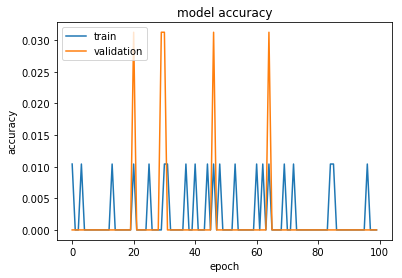

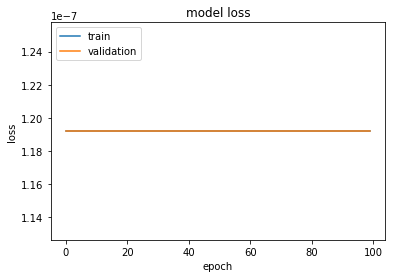

In [138]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [139]:
EPOCHS = 500
"""model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, 
          epochs=EPOCHS, callbacks=[model_checkpoint_callback])"""
model.fit(train_it, steps_per_epoch=20, validation_data=valid_it, validation_steps=4, 
          epochs=EPOCHS, callbacks=[model_checkpoint_callback])

Epoch 1/500
20/20 [==============================] - ETA: 0s - loss: 18.6039 - accuracy: 0.4725
Epoch 1: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 18.6039 - accuracy: 0.4725 - val_loss: 45.3515 - val_accuracy: 0.2500
Epoch 2/500
20/20 [==============================] - ETA: 0s - loss: 18.8840 - accuracy: 0.4925
Epoch 2: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 29s 1s/step - loss: 18.8840 - accuracy: 0.4925 - val_loss: 24.7652 - val_accuracy: 0.4688
Epoch 3/500
20/20 [==============================] - ETA: 0s - loss: 19.6289 - accuracy: 0.4500
Epoch 3: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] 

20/20 [==============================] - 29s 1s/step - loss: 17.1526 - accuracy: 0.5050 - val_loss: 46.4591 - val_accuracy: 0.2188
Epoch 24/500
20/20 [==============================] - ETA: 0s - loss: 19.8737 - accuracy: 0.4400
Epoch 24: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 19.8737 - accuracy: 0.4400 - val_loss: 49.3518 - val_accuracy: 0.2500
Epoch 25/500
20/20 [==============================] - ETA: 0s - loss: 18.4134 - accuracy: 0.5150
Epoch 25: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 18.4134 - accuracy: 0.5150 - val_loss: 31.3121 - val_accuracy: 0.2500
Epoch 26/500
20/20 [==============================] - ETA: 0s - loss: 17.3344 - accuracy: 0.5475
Epoch 26: saving model to C:\Users\Insaf

20/20 [==============================] - ETA: 0s - loss: 19.0278 - accuracy: 0.4950
Epoch 46: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 19.0278 - accuracy: 0.4950 - val_loss: 32.3188 - val_accuracy: 0.4062
Epoch 47/500
20/20 [==============================] - ETA: 0s - loss: 18.1250 - accuracy: 0.5125
Epoch 47: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 29s 1s/step - loss: 18.1250 - accuracy: 0.5125 - val_loss: 33.9698 - val_accuracy: 0.4688
Epoch 48/500
20/20 [==============================] - ETA: 0s - loss: 18.8673 - accuracy: 0.5275
Epoch 48: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1

20/20 [==============================] - 27s 1s/step - loss: 14.8464 - accuracy: 0.6025 - val_loss: 33.4190 - val_accuracy: 0.2812
Epoch 69/500
20/20 [==============================] - ETA: 0s - loss: 16.5413 - accuracy: 0.5650
Epoch 69: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 16.5413 - accuracy: 0.5650 - val_loss: 32.7260 - val_accuracy: 0.3438
Epoch 70/500
20/20 [==============================] - ETA: 0s - loss: 18.4700 - accuracy: 0.5275
Epoch 70: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 18.4700 - accuracy: 0.5275 - val_loss: 52.2844 - val_accuracy: 0.3125
Epoch 71/500
20/20 [==============================] - ETA: 0s - loss: 17.8737 - accuracy: 0.5375
Epoch 71: saving model to C:\Users\Insaf

20/20 [==============================] - ETA: 0s - loss: 18.1036 - accuracy: 0.5625
Epoch 91: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 18.1036 - accuracy: 0.5625 - val_loss: 38.8921 - val_accuracy: 0.4062
Epoch 92/500
20/20 [==============================] - ETA: 0s - loss: 17.9409 - accuracy: 0.5575
Epoch 92: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 17.9409 - accuracy: 0.5575 - val_loss: 50.4293 - val_accuracy: 0.4062
Epoch 93/500
20/20 [==============================] - ETA: 0s - loss: 15.6816 - accuracy: 0.5650
Epoch 93: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1

20/20 [==============================] - 27s 1s/step - loss: 15.0949 - accuracy: 0.6050 - val_loss: 33.1928 - val_accuracy: 0.4375
Epoch 114/500
20/20 [==============================] - ETA: 0s - loss: 11.9328 - accuracy: 0.6300
Epoch 114: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 11.9328 - accuracy: 0.6300 - val_loss: 53.7341 - val_accuracy: 0.2500
Epoch 115/500
20/20 [==============================] - ETA: 0s - loss: 16.1802 - accuracy: 0.6057
Epoch 115: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 16.1802 - accuracy: 0.6057 - val_loss: 33.8432 - val_accuracy: 0.5000
Epoch 116/500
20/20 [==============================] - ETA: 0s - loss: 16.0939 - accuracy: 0.6000
Epoch 116: saving model to C:\Users

Epoch 136/500
20/20 [==============================] - ETA: 0s - loss: 17.8044 - accuracy: 0.5850
Epoch 136: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 17.8044 - accuracy: 0.5850 - val_loss: 48.3492 - val_accuracy: 0.3750
Epoch 137/500
20/20 [==============================] - ETA: 0s - loss: 15.6074 - accuracy: 0.5875
Epoch 137: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 29s 1s/step - loss: 15.6074 - accuracy: 0.5875 - val_loss: 30.9252 - val_accuracy: 0.4375
Epoch 138/500
20/20 [==============================] - ETA: 0s - loss: 15.0983 - accuracy: 0.6300
Epoch 138: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - ETA: 0s - loss: 16.5693 - accuracy: 0.6110
Epoch 158: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 37s 2s/step - loss: 16.5693 - accuracy: 0.6110 - val_loss: 40.9241 - val_accuracy: 0.3750
Epoch 159/500
20/20 [==============================] - ETA: 0s - loss: 16.7803 - accuracy: 0.6000
Epoch 159: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 56s 3s/step - loss: 16.7803 - accuracy: 0.6000 - val_loss: 41.4770 - val_accuracy: 0.3750
Epoch 160/500
20/20 [==============================] - ETA: 0s - loss: 14.2808 - accuracy: 0.6350
Epoch 160: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 

20/20 [==============================] - 31s 2s/step - loss: 16.3607 - accuracy: 0.5900 - val_loss: 37.1837 - val_accuracy: 0.5000
Epoch 181/500
20/20 [==============================] - ETA: 0s - loss: 16.2352 - accuracy: 0.6275
Epoch 181: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 16.2352 - accuracy: 0.6275 - val_loss: 54.7304 - val_accuracy: 0.3750
Epoch 182/500
20/20 [==============================] - ETA: 0s - loss: 15.0137 - accuracy: 0.6300
Epoch 182: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 15.0137 - accuracy: 0.6300 - val_loss: 38.9506 - val_accuracy: 0.3438
Epoch 183/500
20/20 [==============================] - ETA: 0s - loss: 15.1990 - accuracy: 0.6300
Epoch 183: saving model to C:\Users

Epoch 203/500
20/20 [==============================] - ETA: 0s - loss: 14.6251 - accuracy: 0.6275
Epoch 203: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 1s/step - loss: 14.6251 - accuracy: 0.6275 - val_loss: 42.9179 - val_accuracy: 0.4375
Epoch 204/500
20/20 [==============================] - ETA: 0s - loss: 16.0425 - accuracy: 0.6225
Epoch 204: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 16.0425 - accuracy: 0.6225 - val_loss: 32.9892 - val_accuracy: 0.5000
Epoch 205/500
20/20 [==============================] - ETA: 0s - loss: 14.7511 - accuracy: 0.6325
Epoch 205: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - ETA: 0s - loss: 14.3696 - accuracy: 0.6350
Epoch 225: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 35s 2s/step - loss: 14.3696 - accuracy: 0.6350 - val_loss: 37.5903 - val_accuracy: 0.4375
Epoch 226/500
20/20 [==============================] - ETA: 0s - loss: 14.6457 - accuracy: 0.6500
Epoch 226: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 36s 2s/step - loss: 14.6457 - accuracy: 0.6500 - val_loss: 26.0484 - val_accuracy: 0.4062
Epoch 227/500
20/20 [==============================] - ETA: 0s - loss: 14.7985 - accuracy: 0.6175
Epoch 227: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 

20/20 [==============================] - 31s 2s/step - loss: 14.7363 - accuracy: 0.6300 - val_loss: 37.6618 - val_accuracy: 0.3750
Epoch 248/500
20/20 [==============================] - ETA: 0s - loss: 13.5587 - accuracy: 0.6950
Epoch 248: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 13.5587 - accuracy: 0.6950 - val_loss: 29.0465 - val_accuracy: 0.4062
Epoch 249/500
20/20 [==============================] - ETA: 0s - loss: 14.5973 - accuracy: 0.6500
Epoch 249: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 32s 2s/step - loss: 14.5973 - accuracy: 0.6500 - val_loss: 19.9208 - val_accuracy: 0.5312
Epoch 250/500
20/20 [==============================] - ETA: 0s - loss: 14.9678 - accuracy: 0.6750
Epoch 250: saving model to C:\Users

Epoch 270/500
20/20 [==============================] - ETA: 0s - loss: 15.2250 - accuracy: 0.6175
Epoch 270: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 15.2250 - accuracy: 0.6175 - val_loss: 42.4385 - val_accuracy: 0.3438
Epoch 271/500
20/20 [==============================] - ETA: 0s - loss: 13.9568 - accuracy: 0.6775
Epoch 271: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 33s 2s/step - loss: 13.9568 - accuracy: 0.6775 - val_loss: 42.3754 - val_accuracy: 0.4375
Epoch 272/500
20/20 [==============================] - ETA: 0s - loss: 15.8732 - accuracy: 0.6300
Epoch 272: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - ETA: 0s - loss: 12.7260 - accuracy: 0.6850
Epoch 292: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 12.7260 - accuracy: 0.6850 - val_loss: 46.4094 - val_accuracy: 0.4062
Epoch 293/500
20/20 [==============================] - ETA: 0s - loss: 17.7267 - accuracy: 0.6550
Epoch 293: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 29s 1s/step - loss: 17.7267 - accuracy: 0.6550 - val_loss: 63.3411 - val_accuracy: 0.3750
Epoch 294/500
20/20 [==============================] - ETA: 0s - loss: 16.5403 - accuracy: 0.5950
Epoch 294: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 

20/20 [==============================] - 28s 1s/step - loss: 15.6481 - accuracy: 0.6375 - val_loss: 17.6055 - val_accuracy: 0.6875
Epoch 315/500
20/20 [==============================] - ETA: 0s - loss: 17.5297 - accuracy: 0.6500
Epoch 315: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 17.5297 - accuracy: 0.6500 - val_loss: 33.0486 - val_accuracy: 0.3750
Epoch 316/500
20/20 [==============================] - ETA: 0s - loss: 16.2561 - accuracy: 0.6125
Epoch 316: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 16.2561 - accuracy: 0.6125 - val_loss: 28.2676 - val_accuracy: 0.4688
Epoch 317/500
20/20 [==============================] - ETA: 0s - loss: 11.9367 - accuracy: 0.7250
Epoch 317: saving model to C:\Users

Epoch 337/500
20/20 [==============================] - ETA: 0s - loss: 18.0619 - accuracy: 0.6475
Epoch 337: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 18.0619 - accuracy: 0.6475 - val_loss: 32.2238 - val_accuracy: 0.5312
Epoch 338/500
20/20 [==============================] - ETA: 0s - loss: 14.3381 - accuracy: 0.6900
Epoch 338: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 14.3381 - accuracy: 0.6900 - val_loss: 31.8403 - val_accuracy: 0.6250
Epoch 339/500
20/20 [==============================] - ETA: 0s - loss: 14.6726 - accuracy: 0.6950
Epoch 339: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - ETA: 0s - loss: 14.0123 - accuracy: 0.6925
Epoch 359: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 14.0123 - accuracy: 0.6925 - val_loss: 48.7778 - val_accuracy: 0.6250
Epoch 360/500
20/20 [==============================] - ETA: 0s - loss: 15.4246 - accuracy: 0.6975
Epoch 360: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 15.4246 - accuracy: 0.6975 - val_loss: 35.7158 - val_accuracy: 0.5625
Epoch 361/500
20/20 [==============================] - ETA: 0s - loss: 15.0249 - accuracy: 0.7150
Epoch 361: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 

20/20 [==============================] - 28s 1s/step - loss: 12.8933 - accuracy: 0.7350 - val_loss: 37.4582 - val_accuracy: 0.4375
Epoch 382/500
20/20 [==============================] - ETA: 0s - loss: 13.5335 - accuracy: 0.7050
Epoch 382: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 29s 1s/step - loss: 13.5335 - accuracy: 0.7050 - val_loss: 42.6721 - val_accuracy: 0.3750
Epoch 383/500
20/20 [==============================] - ETA: 0s - loss: 14.8624 - accuracy: 0.6825
Epoch 383: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 29s 1s/step - loss: 14.8624 - accuracy: 0.6825 - val_loss: 48.3753 - val_accuracy: 0.4688
Epoch 384/500
20/20 [==============================] - ETA: 0s - loss: 12.6723 - accuracy: 0.6925
Epoch 384: saving model to C:\Users

Epoch 404/500
20/20 [==============================] - ETA: 0s - loss: 15.2413 - accuracy: 0.6775
Epoch 404: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 15.2413 - accuracy: 0.6775 - val_loss: 23.6598 - val_accuracy: 0.5000
Epoch 405/500
20/20 [==============================] - ETA: 0s - loss: 12.4663 - accuracy: 0.7175
Epoch 405: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 12.4663 - accuracy: 0.7175 - val_loss: 19.4036 - val_accuracy: 0.5312
Epoch 406/500
20/20 [==============================] - ETA: 0s - loss: 11.5871 - accuracy: 0.6875
Epoch 406: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - ETA: 0s - loss: 13.1823 - accuracy: 0.7150
Epoch 426: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 29s 1s/step - loss: 13.1823 - accuracy: 0.7150 - val_loss: 54.2286 - val_accuracy: 0.3438
Epoch 427/500
20/20 [==============================] - ETA: 0s - loss: 12.4723 - accuracy: 0.7150
Epoch 427: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 12.4723 - accuracy: 0.7150 - val_loss: 25.3705 - val_accuracy: 0.5625
Epoch 428/500
20/20 [==============================] - ETA: 0s - loss: 13.9490 - accuracy: 0.6950
Epoch 428: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 

20/20 [==============================] - 28s 1s/step - loss: 12.2120 - accuracy: 0.7200 - val_loss: 38.7281 - val_accuracy: 0.4062
Epoch 449/500
20/20 [==============================] - ETA: 0s - loss: 13.2201 - accuracy: 0.7154
Epoch 449: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 13.2201 - accuracy: 0.7154 - val_loss: 26.6176 - val_accuracy: 0.6250
Epoch 450/500
20/20 [==============================] - ETA: 0s - loss: 12.2150 - accuracy: 0.6925
Epoch 450: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 12.2150 - accuracy: 0.6925 - val_loss: 31.1875 - val_accuracy: 0.5938
Epoch 451/500
20/20 [==============================] - ETA: 0s - loss: 14.2799 - accuracy: 0.6850
Epoch 451: saving model to C:\Users

Epoch 471/500
20/20 [==============================] - ETA: 0s - loss: 12.7505 - accuracy: 0.7150
Epoch 471: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 12.7505 - accuracy: 0.7150 - val_loss: 49.2531 - val_accuracy: 0.6250
Epoch 472/500
20/20 [==============================] - ETA: 0s - loss: 13.5892 - accuracy: 0.7100
Epoch 472: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 13.5892 - accuracy: 0.7100 - val_loss: 36.6698 - val_accuracy: 0.5625
Epoch 473/500
20/20 [==============================] - ETA: 0s - loss: 11.7842 - accuracy: 0.7325
Epoch 473: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - ETA: 0s - loss: 12.5805 - accuracy: 0.6625
Epoch 493: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 12.5805 - accuracy: 0.6625 - val_loss: 40.5512 - val_accuracy: 0.5000
Epoch 494/500
20/20 [==============================] - ETA: 0s - loss: 11.2182 - accuracy: 0.7125
Epoch 494: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 11.2182 - accuracy: 0.7125 - val_loss: 40.9981 - val_accuracy: 0.4375
Epoch 495/500
20/20 [==============================] - ETA: 0s - loss: 14.2798 - accuracy: 0.7025
Epoch 495: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 

# end of code that works

In [140]:
EPOCHS = 500
"""model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, 
          epochs=EPOCHS, callbacks=[model_checkpoint_callback])"""
model.fit(train_it, steps_per_epoch=20, validation_data=valid_it, validation_steps=4, 
          epochs=EPOCHS, callbacks=[model_checkpoint_callback])

Epoch 1/500
20/20 [==============================] - ETA: 0s - loss: 14.4202 - accuracy: 0.6925
Epoch 1: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 14.4202 - accuracy: 0.6925 - val_loss: 32.7214 - val_accuracy: 0.5000
Epoch 2/500
20/20 [==============================] - ETA: 0s - loss: 12.7844 - accuracy: 0.7300
Epoch 2: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 12.7844 - accuracy: 0.7300 - val_loss: 33.2791 - val_accuracy: 0.4375
Epoch 3/500
20/20 [==============================] - ETA: 0s - loss: 14.0073 - accuracy: 0.7100
Epoch 3: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] 

20/20 [==============================] - 28s 1s/step - loss: 13.4603 - accuracy: 0.7200 - val_loss: 26.1555 - val_accuracy: 0.5938
Epoch 24/500
20/20 [==============================] - ETA: 0s - loss: 12.5753 - accuracy: 0.7300
Epoch 24: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 12.5753 - accuracy: 0.7300 - val_loss: 20.1144 - val_accuracy: 0.5938
Epoch 25/500
20/20 [==============================] - ETA: 0s - loss: 13.6534 - accuracy: 0.6975
Epoch 25: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 13.6534 - accuracy: 0.6975 - val_loss: 21.5660 - val_accuracy: 0.6250
Epoch 26/500
20/20 [==============================] - ETA: 0s - loss: 14.3287 - accuracy: 0.7075
Epoch 26: saving model to C:\Users\Insaf

20/20 [==============================] - ETA: 0s - loss: 15.4835 - accuracy: 0.6625
Epoch 46: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 15.4835 - accuracy: 0.6625 - val_loss: 21.3315 - val_accuracy: 0.3750
Epoch 47/500
20/20 [==============================] - ETA: 0s - loss: 15.1171 - accuracy: 0.6900
Epoch 47: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 27s 1s/step - loss: 15.1171 - accuracy: 0.6900 - val_loss: 29.7794 - val_accuracy: 0.5938
Epoch 48/500
20/20 [==============================] - ETA: 0s - loss: 11.3031 - accuracy: 0.7050
Epoch 48: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1

20/20 [==============================] - 31s 2s/step - loss: 13.1819 - accuracy: 0.7100 - val_loss: 40.7152 - val_accuracy: 0.4688
Epoch 69/500
20/20 [==============================] - ETA: 0s - loss: 14.0171 - accuracy: 0.7225
Epoch 69: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 14.0171 - accuracy: 0.7225 - val_loss: 14.0818 - val_accuracy: 0.5625
Epoch 70/500
20/20 [==============================] - ETA: 0s - loss: 14.8361 - accuracy: 0.6850
Epoch 70: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 14.8361 - accuracy: 0.6850 - val_loss: 36.5946 - val_accuracy: 0.5312
Epoch 71/500
20/20 [==============================] - ETA: 0s - loss: 12.6339 - accuracy: 0.7125
Epoch 71: saving model to C:\Users\Insaf

20/20 [==============================] - ETA: 0s - loss: 8.8682 - accuracy: 0.7525
Epoch 91: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 8.8682 - accuracy: 0.7525 - val_loss: 48.4242 - val_accuracy: 0.4375
Epoch 92/500
20/20 [==============================] - ETA: 0s - loss: 12.8203 - accuracy: 0.7000
Epoch 92: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 28s 1s/step - loss: 12.8203 - accuracy: 0.7000 - val_loss: 35.5523 - val_accuracy: 0.3750
Epoch 93/500
20/20 [==============================] - ETA: 0s - loss: 12.9676 - accuracy: 0.7500
Epoch 93: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 29s 1s/

20/20 [==============================] - 31s 2s/step - loss: 13.0264 - accuracy: 0.7100 - val_loss: 51.3301 - val_accuracy: 0.4688
Epoch 114/500
20/20 [==============================] - ETA: 0s - loss: 16.2554 - accuracy: 0.6850
Epoch 114: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 16.2554 - accuracy: 0.6850 - val_loss: 31.6108 - val_accuracy: 0.4375
Epoch 115/500
20/20 [==============================] - ETA: 0s - loss: 12.5653 - accuracy: 0.7225
Epoch 115: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 33s 2s/step - loss: 12.5653 - accuracy: 0.7225 - val_loss: 43.0710 - val_accuracy: 0.3750
Epoch 116/500
20/20 [==============================] - ETA: 0s - loss: 14.1989 - accuracy: 0.7225
Epoch 116: saving model to C:\Users

Epoch 136/500
20/20 [==============================] - ETA: 0s - loss: 13.8192 - accuracy: 0.7300
Epoch 136: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 13.8192 - accuracy: 0.7300 - val_loss: 35.5771 - val_accuracy: 0.5000
Epoch 137/500
20/20 [==============================] - ETA: 0s - loss: 10.5426 - accuracy: 0.7475
Epoch 137: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 10.5426 - accuracy: 0.7475 - val_loss: 38.7840 - val_accuracy: 0.5312
Epoch 138/500
20/20 [==============================] - ETA: 0s - loss: 11.2084 - accuracy: 0.7600
Epoch 138: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - 31s 2s/step - loss: 13.2269 - accuracy: 0.7050 - val_loss: 41.8054 - val_accuracy: 0.4062
Epoch 159/500
20/20 [==============================] - ETA: 0s - loss: 11.5121 - accuracy: 0.7325
Epoch 159: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 11.5121 - accuracy: 0.7325 - val_loss: 35.0140 - val_accuracy: 0.5312
Epoch 160/500
20/20 [==============================] - ETA: 0s - loss: 16.7518 - accuracy: 0.6900
Epoch 160: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 16.7518 - accuracy: 0.6900 - val_loss: 47.9025 - val_accuracy: 0.3125
Epoch 161/500
20/20 [==============================] - ETA: 0s - loss: 11.8360 - accuracy: 0.7475
Epoch 161: saving model to C:\Users

Epoch 181/500
20/20 [==============================] - ETA: 0s - loss: 12.2886 - accuracy: 0.7375
Epoch 181: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 1s/step - loss: 12.2886 - accuracy: 0.7375 - val_loss: 42.7737 - val_accuracy: 0.5000
Epoch 182/500
20/20 [==============================] - ETA: 0s - loss: 12.1868 - accuracy: 0.7500
Epoch 182: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 12.1868 - accuracy: 0.7500 - val_loss: 29.0259 - val_accuracy: 0.5625
Epoch 183/500
20/20 [==============================] - ETA: 0s - loss: 12.7831 - accuracy: 0.7350
Epoch 183: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - 30s 2s/step - loss: 12.0304 - accuracy: 0.7350 - val_loss: 35.9170 - val_accuracy: 0.5312
Epoch 204/500
20/20 [==============================] - ETA: 0s - loss: 10.2609 - accuracy: 0.7275
Epoch 204: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 10.2609 - accuracy: 0.7275 - val_loss: 21.6088 - val_accuracy: 0.6562
Epoch 205/500
20/20 [==============================] - ETA: 0s - loss: 12.3916 - accuracy: 0.7650
Epoch 205: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 12.3916 - accuracy: 0.7650 - val_loss: 31.6660 - val_accuracy: 0.5938
Epoch 206/500
20/20 [==============================] - ETA: 0s - loss: 13.5964 - accuracy: 0.7175
Epoch 206: saving model to C:\Users

Epoch 226/500
20/20 [==============================] - ETA: 0s - loss: 12.8980 - accuracy: 0.7150
Epoch 226: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 12.8980 - accuracy: 0.7150 - val_loss: 15.6500 - val_accuracy: 0.6250
Epoch 227/500
20/20 [==============================] - ETA: 0s - loss: 13.1052 - accuracy: 0.7550
Epoch 227: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 1s/step - loss: 13.1052 - accuracy: 0.7550 - val_loss: 51.7998 - val_accuracy: 0.5000
Epoch 228/500
20/20 [==============================] - ETA: 0s - loss: 11.1416 - accuracy: 0.7575
Epoch 228: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - 31s 2s/step - loss: 11.0906 - accuracy: 0.7575 - val_loss: 33.6251 - val_accuracy: 0.4688
Epoch 249/500
20/20 [==============================] - ETA: 0s - loss: 11.1343 - accuracy: 0.7350
Epoch 249: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 11.1343 - accuracy: 0.7350 - val_loss: 21.3422 - val_accuracy: 0.6562
Epoch 250/500
20/20 [==============================] - ETA: 0s - loss: 11.9300 - accuracy: 0.7600
Epoch 250: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 1s/step - loss: 11.9300 - accuracy: 0.7600 - val_loss: 41.5227 - val_accuracy: 0.4688
Epoch 251/500
20/20 [==============================] - ETA: 0s - loss: 10.6516 - accuracy: 0.7750
Epoch 251: saving model to C:\Users

Epoch 271/500
20/20 [==============================] - ETA: 0s - loss: 11.7217 - accuracy: 0.7650
Epoch 271: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 11.7217 - accuracy: 0.7650 - val_loss: 32.8471 - val_accuracy: 0.5312
Epoch 272/500
20/20 [==============================] - ETA: 0s - loss: 10.9922 - accuracy: 0.7525
Epoch 272: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 1s/step - loss: 10.9922 - accuracy: 0.7525 - val_loss: 29.3426 - val_accuracy: 0.6250
Epoch 273/500
20/20 [==============================] - ETA: 0s - loss: 10.5608 - accuracy: 0.7425
Epoch 273: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - ETA: 0s - loss: 13.0751 - accuracy: 0.7425
Epoch 293: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 13.0751 - accuracy: 0.7425 - val_loss: 42.9692 - val_accuracy: 0.4375
Epoch 294/500
20/20 [==============================] - ETA: 0s - loss: 9.7640 - accuracy: 0.7575
Epoch 294: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 9.7640 - accuracy: 0.7575 - val_loss: 37.4394 - val_accuracy: 0.5000
Epoch 295/500
20/20 [==============================] - ETA: 0s - loss: 13.7614 - accuracy: 0.7525
Epoch 295: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 32

20/20 [==============================] - 30s 2s/step - loss: 13.9261 - accuracy: 0.7400 - val_loss: 29.5610 - val_accuracy: 0.6875
Epoch 316/500
20/20 [==============================] - ETA: 0s - loss: 10.5379 - accuracy: 0.7450
Epoch 316: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 10.5379 - accuracy: 0.7450 - val_loss: 35.9538 - val_accuracy: 0.5000
Epoch 317/500
20/20 [==============================] - ETA: 0s - loss: 10.9642 - accuracy: 0.7625
Epoch 317: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 10.9642 - accuracy: 0.7625 - val_loss: 42.1398 - val_accuracy: 0.4375
Epoch 318/500
20/20 [==============================] - ETA: 0s - loss: 10.3131 - accuracy: 0.7675
Epoch 318: saving model to C:\Users

Epoch 338/500
20/20 [==============================] - ETA: 0s - loss: 13.2583 - accuracy: 0.7475
Epoch 338: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 13.2583 - accuracy: 0.7475 - val_loss: 42.2164 - val_accuracy: 0.5312
Epoch 339/500
20/20 [==============================] - ETA: 0s - loss: 12.9898 - accuracy: 0.7525
Epoch 339: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 12.9898 - accuracy: 0.7525 - val_loss: 42.3462 - val_accuracy: 0.5625
Epoch 340/500
20/20 [==============================] - ETA: 0s - loss: 11.5546 - accuracy: 0.7425
Epoch 340: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - 30s 2s/step - loss: 11.9765 - accuracy: 0.7525 - val_loss: 31.9131 - val_accuracy: 0.5938
Epoch 361/500
20/20 [==============================] - ETA: 0s - loss: 11.6458 - accuracy: 0.7525
Epoch 361: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 11.6458 - accuracy: 0.7525 - val_loss: 23.6087 - val_accuracy: 0.4688
Epoch 362/500
20/20 [==============================] - ETA: 0s - loss: 12.4723 - accuracy: 0.7475
Epoch 362: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 12.4723 - accuracy: 0.7475 - val_loss: 15.8837 - val_accuracy: 0.6875
Epoch 363/500
20/20 [==============================] - ETA: 0s - loss: 12.1565 - accuracy: 0.7400
Epoch 363: saving model to C:\Users

Epoch 383/500
20/20 [==============================] - ETA: 0s - loss: 9.6845 - accuracy: 0.7875
Epoch 383: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 9.6845 - accuracy: 0.7875 - val_loss: 25.0026 - val_accuracy: 0.3750
Epoch 384/500
20/20 [==============================] - ETA: 0s - loss: 11.4765 - accuracy: 0.7800
Epoch 384: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 11.4765 - accuracy: 0.7800 - val_loss: 30.4333 - val_accuracy: 0.5625
Epoch 385/500
20/20 [==============================] - ETA: 0s - loss: 11.0134 - accuracy: 0.7275
Epoch 385: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [======================

20/20 [==============================] - 30s 1s/step - loss: 9.9894 - accuracy: 0.7550 - val_loss: 12.3208 - val_accuracy: 0.8125
Epoch 406/500
20/20 [==============================] - ETA: 0s - loss: 10.1317 - accuracy: 0.7725
Epoch 406: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 10.1317 - accuracy: 0.7725 - val_loss: 11.7104 - val_accuracy: 0.6875
Epoch 407/500
20/20 [==============================] - ETA: 0s - loss: 11.8182 - accuracy: 0.7500
Epoch 407: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 1s/step - loss: 11.8182 - accuracy: 0.7500 - val_loss: 24.2232 - val_accuracy: 0.5625
Epoch 408/500
20/20 [==============================] - ETA: 0s - loss: 12.2177 - accuracy: 0.7275
Epoch 408: saving model to C:\Users\

Epoch 428/500
20/20 [==============================] - ETA: 0s - loss: 13.0937 - accuracy: 0.7325
Epoch 428: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 13.0937 - accuracy: 0.7325 - val_loss: 28.8564 - val_accuracy: 0.5938
Epoch 429/500
20/20 [==============================] - ETA: 0s - loss: 12.2714 - accuracy: 0.7575
Epoch 429: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 12.2714 - accuracy: 0.7575 - val_loss: 31.9624 - val_accuracy: 0.5938
Epoch 430/500
20/20 [==============================] - ETA: 0s - loss: 8.1464 - accuracy: 0.7900
Epoch 430: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [=====================

20/20 [==============================] - 30s 2s/step - loss: 11.2647 - accuracy: 0.7325 - val_loss: 13.7765 - val_accuracy: 0.8125
Epoch 451/500
20/20 [==============================] - ETA: 0s - loss: 9.7749 - accuracy: 0.7425
Epoch 451: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 9.7749 - accuracy: 0.7425 - val_loss: 31.7682 - val_accuracy: 0.5625
Epoch 452/500
20/20 [==============================] - ETA: 0s - loss: 12.6668 - accuracy: 0.7375
Epoch 452: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 12.6668 - accuracy: 0.7375 - val_loss: 33.5071 - val_accuracy: 0.6562
Epoch 453/500
20/20 [==============================] - ETA: 0s - loss: 10.1704 - accuracy: 0.7950
Epoch 453: saving model to C:\Users\I

Epoch 473/500
20/20 [==============================] - ETA: 0s - loss: 11.2807 - accuracy: 0.7800
Epoch 473: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 11.2807 - accuracy: 0.7800 - val_loss: 29.3547 - val_accuracy: 0.6562
Epoch 474/500
20/20 [==============================] - ETA: 0s - loss: 10.5689 - accuracy: 0.7600
Epoch 474: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 10.5689 - accuracy: 0.7600 - val_loss: 19.0872 - val_accuracy: 0.6562
Epoch 475/500
20/20 [==============================] - ETA: 0s - loss: 10.1336 - accuracy: 0.7800
Epoch 475: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [====================

20/20 [==============================] - 30s 2s/step - loss: 9.2660 - accuracy: 0.7775 - val_loss: 32.8216 - val_accuracy: 0.5625
Epoch 496/500
20/20 [==============================] - ETA: 0s - loss: 9.3915 - accuracy: 0.7700
Epoch 496: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 31s 2s/step - loss: 9.3915 - accuracy: 0.7700 - val_loss: 37.5885 - val_accuracy: 0.4375
Epoch 497/500
20/20 [==============================] - ETA: 0s - loss: 10.0552 - accuracy: 0.7700
Epoch 497: saving model to C:\Users\Insaf\Documents\PFE\codes\my_code_versions\version_0.1\13-Insaf_classify\checkpoint\training_1\cp.ckpt
20/20 [==============================] - 30s 2s/step - loss: 10.0552 - accuracy: 0.7700 - val_loss: 30.2878 - val_accuracy: 0.6562
Epoch 498/500
20/20 [==============================] - ETA: 0s - loss: 11.3593 - accuracy: 0.7625
Epoch 498: saving model to C:\Users\In

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


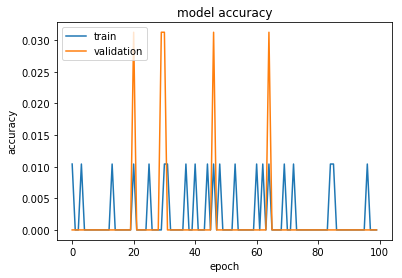

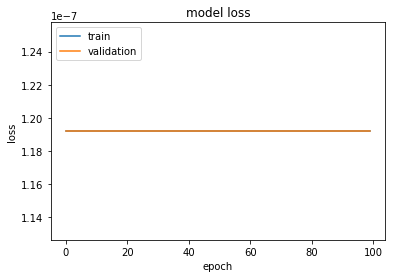

In [141]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [142]:
### retrain from last checkpoint
# to reload check the link: https://www.tensorflow.org/tutorials/keras/save_and_load?hl=fr
#model_checkpoint_callback
#model.load_weights(checkpoint_filepath)

In [143]:
# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
"""model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, 
          epochs=EPOCHS, callbacks=[model_checkpoint_callback])"""

'model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, \n          epochs=EPOCHS, callbacks=[model_checkpoint_callback])'

In [96]:
"""try:
    history = model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=10)
except:
    print("stopped at epoch ")"""

#history = model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=100)

Epoch 1/100
12/12 [==============================] - 9s 792ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0104 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 14s 1s/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 15s 1s/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 10s 835ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0104 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 25s 2s/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 9s 776ms/step - loss: 1.1921e-07 - categorica

12/12 [==============================] - 9s 726ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 47/100
12/12 [==============================] - 9s 748ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0104 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0312
Epoch 48/100
12/12 [==============================] - 9s 736ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 49/100
12/12 [==============================] - 9s 801ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0104 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 50/100
12/12 [==============================] - 10s 843ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 51/100
12/12 [==============================] - 9s 803ms/step - loss: 1.1921e-07 - categorical_acc

Epoch 91/100
12/12 [==============================] - 9s 738ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 92/100
12/12 [==============================] - 9s 775ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 93/100
12/12 [==============================] - 9s 739ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 94/100
12/12 [==============================] - 11s 897ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 95/100
12/12 [==============================] - 10s 864ms/step - loss: 1.1921e-07 - categorical_accuracy: 0.0000e+00 - val_loss: 1.1921e-07 - val_categorical_accuracy: 0.0000e+00
Epoch 96/100
12/12 [==============================] - 9s 757ms/step - loss: 1.

In [173]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    #print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    #print('Processed image shape: ', image.shape)
    return image

In [176]:
i=0
image_path = os.path.join(folder_images, "image.2809.jpg")
image_path

'C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1\\0-dataset\\test_images\\image.2809.jpg'

In [186]:
image_path = "C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1\\13-Insaf_classify\\data\\gold_included\\train\\46\\qwant_7.jpg"

In [177]:
image_path

'C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1\\0-dataset\\test_images\\image.2809.jpg'

In [187]:
image = load_and_process_image(image_path)

In [188]:
predictions2 = model.predict(image)        

1/1 [==============================] - 0s 87ms/step


In [195]:
np.argmax(predictions2[0])

73

In [198]:
predictions2.argmax(axis=-1)

array([73], dtype=int64)

In [193]:
np.max(predictions2[0])

0.9999827

In [221]:
classes = []
dd= "data\\gold_included\\train"
for subdir in sorted(os.listdir(dd)): 
    if os.path.isdir(os.path.join(dd, subdir)): 
        classes.append(subdir)

In [207]:
int(classes[2])

10

In [215]:
classes2 = [int(x) for x in classes]

In [223]:
classes

array([  0,   1, 112, 223, 334, 408, 419, 430, 441, 452,   2,  13,  24,
        35,  46,  57,  68,  79,  90, 101, 113, 124, 135, 146, 157, 168,
       179, 190, 201, 212, 224, 235, 246, 257, 268, 279, 290, 301, 312,
       323, 335, 346, 357, 368, 379, 390, 401, 405, 406, 407, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 420, 421, 422, 423, 424,
       425, 426, 427, 428, 429, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 453,
       454, 455, 456, 457, 458, 459, 460, 461, 462,   3,   4,   5,   6,
         7,   8,   9,  10,  11,  12,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  9

In [224]:
classes[2]

112

In [167]:
folder_images

'C:\\Users\\Insaf\\Documents\\PFE\\codes\\my_code_versions\\version_0.1\\0-dataset\\test_images'

In [180]:
predictions2[0][46]

2.0034456e-24

In [162]:
predictions[0][i]

0.63739413

In [225]:
# first prepare the classes
# This is because keras takes classes not in the order I wanted from 0 to 463
classes = []
dd= "data\\gold_included\\train"
for subdir in sorted(os.listdir(dd)): 
    if os.path.isdir(os.path.join(dd, subdir)): 
        classes.append(subdir)
classes = np.argsort(np.array(np.array([int(x) for x in classes])))

matches = np.zeros((df_data.shape[0], 10))
for i in range (df_gold.shape[0]):
    print("treating context " , i)
    for j in range (2,df_data.shape[1]):
        image_path = os.path.join(folder_images, df_data.iloc[i][j])
        image = load_and_process_image(image_path)
        predictions = model.predict(image)        
        matches[i,j-2]= predictions[0][classes[i]]
                
        
matches_df = pd.DataFrame(matches)
final_result_images = []
final_result_distances = []
for idx, row in matches_df.iterrows():
    dist_test = row
    ranked_dist = -np.sort(-dist_test)
    ranked_dist_indices = np.argsort(-dist_test)
    sorted_df = np.array(df_data.iloc[idx][ranked_dist_indices+2])
    final_result_images.append(sorted_df)
    final_result_distances.append(ranked_dist)
    
result_tocsv = pd.DataFrame()
result_tocsv["language"]=[]
result_tocsv["data"]=[]
result_tocsv["candidate"]=final_result_images
result_tocsv["relevance"]=final_result_distances
result_tocsv["language"]=language
result_tocsv["gold"]=df_gold.values
result_tocsv["data"]=range(len(final_result_distances))

# save the csv of results
result_path = "Results"
if not os.path.exists(result_path):
    os.makedirs(result_path)   
    
result_name =os.path.join(result_path, "test_sorting13.csv" )
result_tocsv.to_csv(result_name)

treating context  0
1/1 [==============================] - 0s 95ms/step
treating context  1
1/1 [==============================] - 0s 87ms/step
treating context  2
1/1 [==============================] - 0s 93ms/step
treating context  3
1/1 [==============================] - 0s 90ms/step
treating context  4
1/1 [==============================] - 0s 99ms/step
treating context  5
1/1 [==============================] - 0s 95ms/step
treating context  6
1/1 [==============================] - 0s 116ms/step
treating context  7
1/1 [==============================] - 0s 90ms/step
treating context  8
1/1 [==============================] - 0s 92ms/step
treating context  9
1/1 [==============================] - 0s 94ms/step
treating context  10
1/1 [==============================] - 0s 101ms/step
treating context  11
1/1 [==============================] - 0s 97ms/step
treating context  12
1/1 [==============================] - 0s 103ms/step
treating context  13
1/1 [==============================] 

1/1 [==============================] - 0s 93ms/step
treating context  16
1/1 [==============================] - 0s 96ms/step
treating context  17
1/1 [==============================] - 0s 92ms/step
treating context  18
1/1 [==============================] - 0s 95ms/step
treating context  19
1/1 [==============================] - 0s 92ms/step
treating context  20
1/1 [==============================] - 0s 90ms/step
treating context  21
1/1 [==============================] - 0s 96ms/step
treating context  22
1/1 [==============================] - 0s 92ms/step
treating context  23
1/1 [==============================] - 0s 92ms/step
treating context  24
1/1 [==============================] - 0s 91ms/step
treating context  25
1/1 [==============================] - 0s 92ms/step
treating context  26
1/1 [==============================] - 0s 89ms/step
treating context  27
1/1 [==============================] - 0s 88ms/step
treating context  28
1/1 [==============================] - 0s 86ms/step

1/1 [==============================] - 0s 87ms/step
treating context  31
1/1 [==============================] - 0s 86ms/step
treating context  32
1/1 [==============================] - 0s 91ms/step
treating context  33
1/1 [==============================] - 0s 95ms/step
treating context  34
1/1 [==============================] - 0s 94ms/step
treating context  35
1/1 [==============================] - 0s 90ms/step
treating context  36
1/1 [==============================] - 0s 95ms/step
treating context  37
1/1 [==============================] - 0s 91ms/step
treating context  38
1/1 [==============================] - 0s 90ms/step
treating context  39
1/1 [==============================] - 0s 90ms/step
treating context  40
1/1 [==============================] - 0s 91ms/step
treating context  41
1/1 [==============================] - 0s 121ms/step
treating context  42
1/1 [==============================] - 0s 92ms/step
treating context  43
1/1 [==============================] - 0s 90ms/ste

1/1 [==============================] - 0s 91ms/step
treating context  46
1/1 [==============================] - 0s 90ms/step
treating context  47
1/1 [==============================] - 0s 83ms/step
treating context  48
1/1 [==============================] - 0s 97ms/step
treating context  49
1/1 [==============================] - 0s 92ms/step
treating context  50
1/1 [==============================] - 0s 91ms/step
treating context  51
1/1 [==============================] - 0s 97ms/step
treating context  52
1/1 [==============================] - 0s 95ms/step
treating context  53
1/1 [==============================] - 0s 96ms/step
treating context  54
1/1 [==============================] - 0s 93ms/step
treating context  55
1/1 [==============================] - 0s 94ms/step
treating context  56
1/1 [==============================] - 0s 90ms/step
treating context  57
1/1 [==============================] - 0s 90ms/step
treating context  58
1/1 [==============================] - 0s 91ms/step

1/1 [==============================] - 0s 96ms/step
treating context  61
1/1 [==============================] - 0s 90ms/step
treating context  62
1/1 [==============================] - 0s 89ms/step
treating context  63
1/1 [==============================] - 0s 91ms/step
treating context  64
1/1 [==============================] - 0s 93ms/step
treating context  65
1/1 [==============================] - 0s 92ms/step
treating context  66
1/1 [==============================] - 0s 88ms/step
treating context  67
1/1 [==============================] - 0s 92ms/step
treating context  68
1/1 [==============================] - 0s 91ms/step
treating context  69
1/1 [==============================] - 0s 91ms/step
treating context  70
1/1 [==============================] - 0s 89ms/step
treating context  71
1/1 [==============================] - 0s 100ms/step
treating context  72
1/1 [==============================] - 0s 100ms/step
treating context  73
1/1 [==============================] - 0s 100ms/s

1/1 [==============================] - 0s 93ms/step
treating context  76
1/1 [==============================] - 0s 98ms/step
treating context  77
1/1 [==============================] - 0s 99ms/step
treating context  78
1/1 [==============================] - 0s 110ms/step
treating context  79
1/1 [==============================] - 0s 105ms/step
treating context  80
1/1 [==============================] - 0s 95ms/step
treating context  81
1/1 [==============================] - 0s 94ms/step
treating context  82
1/1 [==============================] - 0s 111ms/step
treating context  83
1/1 [==============================] - 0s 95ms/step
treating context  84
1/1 [==============================] - 0s 90ms/step
treating context  85
1/1 [==============================] - 0s 99ms/step
treating context  86
1/1 [==============================] - 0s 100ms/step
treating context  87
1/1 [==============================] - 0s 94ms/step
treating context  88
1/1 [==============================] - 0s 91ms/

1/1 [==============================] - 0s 95ms/step
treating context  91
1/1 [==============================] - 0s 102ms/step
treating context  92
1/1 [==============================] - 0s 108ms/step
treating context  93
1/1 [==============================] - 0s 98ms/step
treating context  94
1/1 [==============================] - 0s 94ms/step
treating context  95
1/1 [==============================] - 0s 99ms/step
treating context  96
1/1 [==============================] - 0s 93ms/step
treating context  97
1/1 [==============================] - 0s 85ms/step
treating context  98
1/1 [==============================] - 0s 91ms/step
treating context  99
1/1 [==============================] - 0s 92ms/step
treating context  100
1/1 [==============================] - 0s 98ms/step
treating context  101
1/1 [==============================] - 0s 99ms/step
treating context  102
1/1 [==============================] - 0s 91ms/step
treating context  103
1/1 [==============================] - 0s 102

1/1 [==============================] - 0s 94ms/step
treating context  106
1/1 [==============================] - 0s 103ms/step
treating context  107
1/1 [==============================] - 0s 90ms/step
treating context  108
1/1 [==============================] - 0s 96ms/step
treating context  109
1/1 [==============================] - 0s 91ms/step
treating context  110
1/1 [==============================] - 0s 95ms/step
treating context  111
1/1 [==============================] - 0s 91ms/step
treating context  112
1/1 [==============================] - 0s 96ms/step
treating context  113
1/1 [==============================] - 0s 87ms/step
treating context  114
1/1 [==============================] - 0s 96ms/step
treating context  115
1/1 [==============================] - 0s 92ms/step
treating context  116
1/1 [==============================] - 0s 96ms/step
treating context  117
1/1 [==============================] - 0s 95ms/step
treating context  118
1/1 [==============================] 

1/1 [==============================] - 0s 99ms/step
treating context  121
1/1 [==============================] - 0s 104ms/step
treating context  122
1/1 [==============================] - 0s 88ms/step
treating context  123
1/1 [==============================] - 0s 89ms/step
treating context  124
1/1 [==============================] - 0s 137ms/step
treating context  125
1/1 [==============================] - 0s 94ms/step
treating context  126
1/1 [==============================] - 0s 96ms/step
treating context  127
1/1 [==============================] - 0s 90ms/step
treating context  128
1/1 [==============================] - 0s 87ms/step
treating context  129
1/1 [==============================] - 0s 88ms/step
treating context  130
1/1 [==============================] - 0s 96ms/step
treating context  131
1/1 [==============================] - 0s 97ms/step
treating context  132
1/1 [==============================] - 0s 96ms/step
treating context  133
1/1 [==============================]

1/1 [==============================] - 0s 96ms/step
treating context  136
1/1 [==============================] - 0s 93ms/step
treating context  137
1/1 [==============================] - 0s 92ms/step
treating context  138
1/1 [==============================] - 0s 100ms/step
treating context  139
1/1 [==============================] - 0s 96ms/step
treating context  140
1/1 [==============================] - 0s 111ms/step
treating context  141
1/1 [==============================] - 0s 95ms/step
treating context  142
1/1 [==============================] - 0s 106ms/step
treating context  143
1/1 [==============================] - 0s 91ms/step
treating context  144
1/1 [==============================] - 0s 94ms/step
treating context  145
1/1 [==============================] - 0s 94ms/step
treating context  146
1/1 [==============================] - 0s 90ms/step
treating context  147
1/1 [==============================] - 0s 94ms/step
treating context  148
1/1 [==============================

1/1 [==============================] - 0s 95ms/step
treating context  151
1/1 [==============================] - 0s 94ms/step
treating context  152
1/1 [==============================] - 0s 96ms/step
treating context  153
1/1 [==============================] - 0s 102ms/step
treating context  154
1/1 [==============================] - 0s 90ms/step
treating context  155
1/1 [==============================] - 0s 96ms/step
treating context  156
1/1 [==============================] - 0s 94ms/step
treating context  157
1/1 [==============================] - 0s 99ms/step
treating context  158
1/1 [==============================] - 0s 113ms/step
treating context  159
1/1 [==============================] - 0s 102ms/step
treating context  160
1/1 [==============================] - 0s 91ms/step
treating context  161
1/1 [==============================] - 0s 91ms/step
treating context  162
1/1 [==============================] - 0s 91ms/step
treating context  163
1/1 [==============================

1/1 [==============================] - 0s 113ms/step
treating context  166
1/1 [==============================] - 0s 97ms/step
treating context  167
1/1 [==============================] - 0s 91ms/step
treating context  168
1/1 [==============================] - 0s 90ms/step
treating context  169
1/1 [==============================] - 0s 95ms/step
treating context  170
1/1 [==============================] - 0s 93ms/step
treating context  171
1/1 [==============================] - 0s 96ms/step
treating context  172
1/1 [==============================] - 0s 95ms/step
treating context  173
1/1 [==============================] - 0s 89ms/step
treating context  174
1/1 [==============================] - 0s 98ms/step
treating context  175
1/1 [==============================] - 0s 92ms/step
treating context  176
1/1 [==============================] - 0s 94ms/step
treating context  177
1/1 [==============================] - 0s 89ms/step
treating context  178
1/1 [==============================] 

1/1 [==============================] - 0s 96ms/step
treating context  181
1/1 [==============================] - 0s 94ms/step
treating context  182
1/1 [==============================] - 0s 96ms/step
treating context  183
1/1 [==============================] - 0s 91ms/step
treating context  184
1/1 [==============================] - 0s 101ms/step
treating context  185
1/1 [==============================] - 0s 92ms/step
treating context  186
1/1 [==============================] - 0s 93ms/step
treating context  187
1/1 [==============================] - 0s 90ms/step
treating context  188
1/1 [==============================] - 0s 90ms/step
treating context  189
1/1 [==============================] - 0s 91ms/step
treating context  190
1/1 [==============================] - 0s 95ms/step
treating context  191
1/1 [==============================] - 0s 93ms/step
treating context  192
1/1 [==============================] - 0s 100ms/step
treating context  193
1/1 [==============================]

1/1 [==============================] - 0s 94ms/step
treating context  196
1/1 [==============================] - 0s 90ms/step
treating context  197
1/1 [==============================] - 0s 93ms/step
treating context  198
1/1 [==============================] - 0s 103ms/step
treating context  199
1/1 [==============================] - 0s 91ms/step
treating context  200
1/1 [==============================] - 0s 98ms/step
treating context  201
1/1 [==============================] - 0s 96ms/step
treating context  202
1/1 [==============================] - 0s 96ms/step
treating context  203
1/1 [==============================] - 0s 89ms/step
treating context  204
1/1 [==============================] - 0s 95ms/step
treating context  205
1/1 [==============================] - 0s 104ms/step
treating context  206
1/1 [==============================] - 0s 88ms/step
treating context  207
1/1 [==============================] - 0s 92ms/step
treating context  208
1/1 [==============================]

1/1 [==============================] - 0s 104ms/step
treating context  211
1/1 [==============================] - 0s 89ms/step
treating context  212
1/1 [==============================] - 0s 95ms/step
treating context  213
1/1 [==============================] - 0s 87ms/step
treating context  214
1/1 [==============================] - 0s 92ms/step
treating context  215
1/1 [==============================] - 0s 95ms/step
treating context  216
1/1 [==============================] - 0s 95ms/step
treating context  217
1/1 [==============================] - 0s 92ms/step
treating context  218
1/1 [==============================] - 0s 95ms/step
treating context  219
1/1 [==============================] - 0s 97ms/step
treating context  220
1/1 [==============================] - 0s 100ms/step
treating context  221
1/1 [==============================] - 0s 91ms/step
treating context  222
1/1 [==============================] - 0s 91ms/step
treating context  223
1/1 [==============================]

1/1 [==============================] - 0s 95ms/step
treating context  226
1/1 [==============================] - 0s 89ms/step
treating context  227
1/1 [==============================] - 0s 95ms/step
treating context  228
1/1 [==============================] - 0s 92ms/step
treating context  229
1/1 [==============================] - 0s 94ms/step
treating context  230
1/1 [==============================] - 0s 91ms/step
treating context  231
1/1 [==============================] - 0s 94ms/step
treating context  232
1/1 [==============================] - 0s 93ms/step
treating context  233
1/1 [==============================] - 0s 88ms/step
treating context  234
1/1 [==============================] - 0s 93ms/step
treating context  235
1/1 [==============================] - 0s 93ms/step
treating context  236
1/1 [==============================] - 0s 95ms/step
treating context  237
1/1 [==============================] - 0s 101ms/step
treating context  238
1/1 [==============================] 

1/1 [==============================] - 0s 97ms/step
treating context  241
1/1 [==============================] - 0s 91ms/step
treating context  242
1/1 [==============================] - 0s 95ms/step
treating context  243
1/1 [==============================] - 0s 90ms/step
treating context  244
1/1 [==============================] - 0s 90ms/step
treating context  245
1/1 [==============================] - 0s 94ms/step
treating context  246
1/1 [==============================] - 0s 93ms/step
treating context  247
1/1 [==============================] - 0s 98ms/step
treating context  248
1/1 [==============================] - 0s 93ms/step
treating context  249
1/1 [==============================] - 0s 94ms/step
treating context  250
1/1 [==============================] - 0s 92ms/step
treating context  251
1/1 [==============================] - 0s 99ms/step
treating context  252
1/1 [==============================] - 0s 109ms/step
treating context  253
1/1 [==============================] 

1/1 [==============================] - 0s 99ms/step
treating context  256
1/1 [==============================] - 0s 106ms/step
treating context  257
1/1 [==============================] - 0s 90ms/step
treating context  258
1/1 [==============================] - 0s 92ms/step
treating context  259
1/1 [==============================] - 0s 90ms/step
treating context  260
1/1 [==============================] - 0s 90ms/step
treating context  261
1/1 [==============================] - 0s 95ms/step
treating context  262
1/1 [==============================] - 0s 98ms/step
treating context  263
1/1 [==============================] - 0s 93ms/step
treating context  264
1/1 [==============================] - 0s 94ms/step
treating context  265
1/1 [==============================] - 0s 90ms/step
treating context  266
1/1 [==============================] - 0s 94ms/step
treating context  267
1/1 [==============================] - 0s 92ms/step
treating context  268
1/1 [==============================] 

1/1 [==============================] - 0s 109ms/step
treating context  271
1/1 [==============================] - 0s 96ms/step
treating context  272
1/1 [==============================] - 0s 89ms/step
treating context  273
1/1 [==============================] - 0s 96ms/step
treating context  274
1/1 [==============================] - 0s 93ms/step
treating context  275
1/1 [==============================] - 0s 92ms/step
treating context  276
1/1 [==============================] - 0s 91ms/step
treating context  277
1/1 [==============================] - 0s 91ms/step
treating context  278
1/1 [==============================] - 0s 89ms/step
treating context  279
1/1 [==============================] - 0s 94ms/step
treating context  280
1/1 [==============================] - 0s 94ms/step
treating context  281
1/1 [==============================] - 0s 103ms/step
treating context  282
1/1 [==============================] - 0s 97ms/step
treating context  283
1/1 [==============================]

1/1 [==============================] - 0s 116ms/step
treating context  286
1/1 [==============================] - 0s 98ms/step
treating context  287
1/1 [==============================] - 0s 100ms/step
treating context  288
1/1 [==============================] - 0s 98ms/step
treating context  289
1/1 [==============================] - 0s 100ms/step
treating context  290
1/1 [==============================] - 0s 103ms/step
treating context  291
1/1 [==============================] - 0s 96ms/step
treating context  292
1/1 [==============================] - 0s 91ms/step
treating context  293
1/1 [==============================] - 0s 98ms/step
treating context  294
1/1 [==============================] - 0s 92ms/step
treating context  295
1/1 [==============================] - 0s 106ms/step
treating context  296
1/1 [==============================] - 0s 98ms/step
treating context  297
1/1 [==============================] - 0s 90ms/step
treating context  298
1/1 [============================

1/1 [==============================] - 0s 98ms/step
treating context  301
1/1 [==============================] - 0s 92ms/step
treating context  302
1/1 [==============================] - 0s 93ms/step
treating context  303
1/1 [==============================] - 0s 91ms/step
treating context  304
1/1 [==============================] - 0s 97ms/step
treating context  305
1/1 [==============================] - 0s 95ms/step
treating context  306
1/1 [==============================] - 0s 97ms/step
treating context  307
1/1 [==============================] - 0s 103ms/step
treating context  308
1/1 [==============================] - 0s 93ms/step
treating context  309
1/1 [==============================] - 0s 94ms/step
treating context  310
1/1 [==============================] - 0s 91ms/step
treating context  311
1/1 [==============================] - 0s 92ms/step
treating context  312
1/1 [==============================] - 0s 94ms/step
treating context  313
1/1 [==============================] 

1/1 [==============================] - 0s 92ms/step
treating context  316
1/1 [==============================] - 0s 94ms/step
treating context  317
1/1 [==============================] - 0s 99ms/step
treating context  318
1/1 [==============================] - 0s 91ms/step
treating context  319
1/1 [==============================] - 0s 97ms/step
treating context  320
1/1 [==============================] - 0s 91ms/step
treating context  321
1/1 [==============================] - 0s 100ms/step
treating context  322
1/1 [==============================] - 0s 96ms/step
treating context  323
1/1 [==============================] - 0s 95ms/step
treating context  324
1/1 [==============================] - 0s 115ms/step
treating context  325
1/1 [==============================] - 0s 103ms/step
treating context  326
1/1 [==============================] - 0s 94ms/step
treating context  327
1/1 [==============================] - 0s 94ms/step
treating context  328
1/1 [==============================

1/1 [==============================] - 0s 91ms/step
treating context  331
1/1 [==============================] - 0s 93ms/step
treating context  332
1/1 [==============================] - 0s 95ms/step
treating context  333
1/1 [==============================] - 0s 94ms/step
treating context  334
1/1 [==============================] - 0s 95ms/step
treating context  335
1/1 [==============================] - 0s 94ms/step
treating context  336
1/1 [==============================] - 0s 104ms/step
treating context  337
1/1 [==============================] - 0s 100ms/step
treating context  338
1/1 [==============================] - 0s 100ms/step
treating context  339
1/1 [==============================] - 0s 90ms/step
treating context  340
1/1 [==============================] - 0s 90ms/step
treating context  341
1/1 [==============================] - 0s 96ms/step
treating context  342
1/1 [==============================] - 0s 103ms/step
treating context  343
1/1 [=============================

1/1 [==============================] - 0s 96ms/step
treating context  346
1/1 [==============================] - 0s 92ms/step
treating context  347
1/1 [==============================] - 0s 92ms/step
treating context  348
1/1 [==============================] - 0s 99ms/step
treating context  349
1/1 [==============================] - 0s 96ms/step
treating context  350
1/1 [==============================] - 0s 98ms/step
treating context  351
1/1 [==============================] - 0s 97ms/step
treating context  352
1/1 [==============================] - 0s 95ms/step
treating context  353
1/1 [==============================] - 0s 98ms/step
treating context  354
1/1 [==============================] - 0s 92ms/step
treating context  355
1/1 [==============================] - 0s 93ms/step
treating context  356
1/1 [==============================] - 0s 96ms/step
treating context  357
1/1 [==============================] - 0s 104ms/step
treating context  358
1/1 [==============================] 

1/1 [==============================] - 0s 97ms/step
treating context  361
1/1 [==============================] - 0s 90ms/step
treating context  362
1/1 [==============================] - 0s 96ms/step
treating context  363
1/1 [==============================] - 0s 97ms/step
treating context  364
1/1 [==============================] - 0s 96ms/step
treating context  365
1/1 [==============================] - 0s 95ms/step
treating context  366
1/1 [==============================] - 0s 96ms/step
treating context  367
1/1 [==============================] - 0s 94ms/step
treating context  368
1/1 [==============================] - 0s 97ms/step
treating context  369
1/1 [==============================] - 0s 90ms/step
treating context  370
1/1 [==============================] - 0s 87ms/step
treating context  371
1/1 [==============================] - 0s 92ms/step
treating context  372
1/1 [==============================] - 0s 97ms/step
treating context  373
1/1 [==============================] -

1/1 [==============================] - 0s 94ms/step
treating context  376
1/1 [==============================] - 0s 95ms/step
treating context  377
1/1 [==============================] - 0s 95ms/step
treating context  378
1/1 [==============================] - 0s 97ms/step
treating context  379
1/1 [==============================] - 0s 102ms/step
treating context  380
1/1 [==============================] - 0s 109ms/step
treating context  381
1/1 [==============================] - 0s 97ms/step
treating context  382
1/1 [==============================] - 0s 91ms/step
treating context  383
1/1 [==============================] - 0s 103ms/step
treating context  384
1/1 [==============================] - 0s 103ms/step
treating context  385
1/1 [==============================] - 0s 93ms/step
treating context  386
1/1 [==============================] - 0s 96ms/step
treating context  387
1/1 [==============================] - 0s 96ms/step
treating context  388
1/1 [=============================

1/1 [==============================] - 0s 95ms/step
treating context  391
1/1 [==============================] - 0s 90ms/step
treating context  392
1/1 [==============================] - 0s 103ms/step
treating context  393
1/1 [==============================] - 0s 98ms/step
treating context  394
1/1 [==============================] - 0s 100ms/step
treating context  395
1/1 [==============================] - 0s 91ms/step
treating context  396
1/1 [==============================] - 0s 92ms/step
treating context  397
1/1 [==============================] - 0s 96ms/step
treating context  398
1/1 [==============================] - 0s 100ms/step
treating context  399
1/1 [==============================] - 0s 98ms/step
treating context  400
1/1 [==============================] - 0s 92ms/step
treating context  401
1/1 [==============================] - 0s 98ms/step
treating context  402
1/1 [==============================] - 0s 92ms/step
treating context  403
1/1 [==============================

1/1 [==============================] - 0s 92ms/step
treating context  406
1/1 [==============================] - 0s 92ms/step
treating context  407
1/1 [==============================] - 0s 93ms/step
treating context  408
1/1 [==============================] - 0s 97ms/step
treating context  409
1/1 [==============================] - 0s 92ms/step
treating context  410
1/1 [==============================] - 0s 96ms/step
treating context  411
1/1 [==============================] - 0s 105ms/step
treating context  412
1/1 [==============================] - 0s 109ms/step
treating context  413
1/1 [==============================] - 0s 98ms/step
treating context  414
1/1 [==============================] - 0s 97ms/step
treating context  415
1/1 [==============================] - 0s 108ms/step
treating context  416
1/1 [==============================] - 0s 93ms/step
treating context  417
1/1 [==============================] - 0s 92ms/step
treating context  418
1/1 [==============================

1/1 [==============================] - 0s 94ms/step
treating context  421
1/1 [==============================] - 0s 95ms/step
treating context  422
1/1 [==============================] - 0s 96ms/step
treating context  423
1/1 [==============================] - 0s 96ms/step
treating context  424
1/1 [==============================] - 0s 94ms/step
treating context  425
1/1 [==============================] - 0s 109ms/step
treating context  426
1/1 [==============================] - 0s 96ms/step
treating context  427
1/1 [==============================] - 0s 97ms/step
treating context  428
1/1 [==============================] - 0s 105ms/step
treating context  429
1/1 [==============================] - 0s 98ms/step
treating context  430
1/1 [==============================] - 0s 99ms/step
treating context  431
1/1 [==============================] - 0s 110ms/step
treating context  432
1/1 [==============================] - 0s 100ms/step
treating context  433
1/1 [=============================

1/1 [==============================] - 0s 113ms/step
treating context  436
1/1 [==============================] - 0s 93ms/step
treating context  437
1/1 [==============================] - 0s 99ms/step
treating context  438
1/1 [==============================] - 0s 110ms/step
treating context  439
1/1 [==============================] - 0s 97ms/step
treating context  440
1/1 [==============================] - 0s 95ms/step
treating context  441
1/1 [==============================] - 0s 97ms/step
treating context  442
1/1 [==============================] - 0s 108ms/step
treating context  443
1/1 [==============================] - 0s 97ms/step
treating context  444
1/1 [==============================] - 0s 95ms/step
treating context  445
1/1 [==============================] - 0s 96ms/step
treating context  446
1/1 [==============================] - 0s 96ms/step
treating context  447
1/1 [==============================] - 0s 91ms/step
treating context  448
1/1 [==============================

1/1 [==============================] - 0s 103ms/step
treating context  451
1/1 [==============================] - 0s 102ms/step
treating context  452
1/1 [==============================] - 0s 100ms/step
treating context  453
1/1 [==============================] - 0s 113ms/step
treating context  454
1/1 [==============================] - 0s 102ms/step
treating context  455
1/1 [==============================] - 0s 104ms/step
treating context  456
1/1 [==============================] - 0s 106ms/step
treating context  457
1/1 [==============================] - 0s 114ms/step
treating context  458
1/1 [==============================] - 0s 100ms/step
treating context  459
1/1 [==============================] - 0s 111ms/step
treating context  460
1/1 [==============================] - 0s 97ms/step
treating context  461
1/1 [==============================] - 0s 98ms/step
treating context  462
1/1 [==============================] - 0s 99ms/step


## Discussion of Results

Both the training and validation accuracy should be quite high. This is a pretty awesome result! We were able to train on a small dataset, but because of the knowledge transferred from the ImageNet model, it was able to achieve high accuracy and generalize well. This means it has a very good sense of Bo and pets who are not Bo.

If you saw some fluctuation in the validation accuracy, that is okay too. We have a technique for improving our model in the next section.

## Fine-Tuning the Model

Now that the new layers of the model are trained, we have the option to apply a final trick to improve the model, called [fine-tuning](https://developers.google.com/machine-learning/glossary#f). To do this we unfreeze the entire model, and train it again with a very small [learning rate](https://developers.google.com/machine-learning/glossary#learning-rate). This will cause the base pre-trained layers to take very small steps and adjust slightly, improving the model by a small amount.  

Note that it is important to only do this step after the model with frozen layers has been fully trained. The untrained pooling and classification layers that we added to the model earlier were randomly initialized. This means they needed to be updated quite a lot to correctly classify the images. Through the process of [backpropagation](https://developers.google.com/machine-learning/glossary#backpropagation), large initial updates in the last layers would have caused potentially large updates in the pre-trained layers as well. These updates would have destroyed those important pre-trained features. However, now that those final layers are trained and have converged, any updates to the model as a whole will be much smaller (especially with a very small learning rate) and will not destroy the features of the earlier layers.

Let's try unfreezing the pre-trained layers, and then fine tuning the model:

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=10)

## Examining the Predictions

Now that we have a well-trained model, it is time to create our doggy door for Bo! We can start by looking at the predictions that come from the model. We will preprocess the image in the same way we did for our last doggy door.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

Try this out on a couple images to see the predictions:

In [ ]:
make_predictions('data/presidential_doggy_door/valid/bo/bo_20.jpg')

In [ ]:
make_predictions('data/presidential_doggy_door/valid/not_bo/121.jpg')

It looks like a negative number prediction means that it is Bo and a positive number prediction means it is something else. We can use this information to have our doggy door only let Bo in! 

## Exercise: Bo's Doggy Door

Fill in the following code to implement Bo's doggy door:

In [ ]:
def presidential_doggy_door(image_path):
    preds = make_predictions(image_path)
    if FIXME:
        print("It's Bo! Let him in!")
    else:
        print("That's not Bo! Stay out!")

## Solution

Click on the '...' below to see the solution.

In [ ]:
# SOLUTION
def presidential_doggy_door(image_path):
    preds = make_predictions(image_path)
    if preds[0] < 0:
        print("It's Bo! Let him in!")
    else:
        print("That's not Bo! Stay out!")

Let's try it out!

In [ ]:
presidential_doggy_door('data/presidential_doggy_door/valid/not_bo/131.jpg')

In [ ]:
presidential_doggy_door('data/presidential_doggy_door/valid/bo/bo_29.jpg')

## Summary

Great work! With transfer learning, you have built a highly accurate model using a very small dataset. This can be an extremely powerful technique, and be the difference between a successful project and one that cannot get off the ground. We hope these techniques can help you out in similar situations in the future!

There is a wealth of helpful resources for transfer learning in the [NVIDIA TAO Toolkit](https://developer.nvidia.com/tlt-getting-started).

### Clear the Memory
Before moving on, please execute the following cell to clear up the GPU memory.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Next

So far, the focus of this workshop has primarily been on image classification. In the next section, in service of giving you a more well-rounded introduction to deep learning, we are going to switch gears and address working with sequential data, which requires a different approach.

<center><a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a></center>